# Assignment 4 Part 2 - Effect size, power, and p-values.

First import the libraries you will use, notice we will be calling `numpy` with `np.` notation, and `matplotlib.pyplot` as `plt`. These are conventional ways to call these libraries:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Practice with synthetic data

First, it is important to know that most random number generators are pseudo-random. Meaning, the random numbers are generated with a seed or initial value, and if you declare this seed at the beginning of your analysis, your randomly generated numbers will be consistent every time your code is ran, giving you reproducible results. In `numpy`'s `random` module, you can declare your random number generator with `seed`, see this answer here for an example: https://stackoverflow.com/a/21494630

There are numerous ways to generate random data, you can check out all the `numpy.random` capabilities here: https://numpy.org/doc/1.16/reference/routines.random.html

For now, we will start with the standard normally distributed data (Gaussians). Start by generating 20 random data points with `numpy`'s `randn`, and visualizing it as a histogram with `matplotlib`'s `hist`: https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.hist.html

Text(0.5, 1.0, 'Histogram of Synthetic Data')

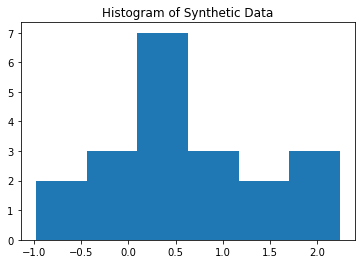

In [27]:
# Pick a random number generator initial seed/value:
np.random.seed(0)

# Create a variable that has 20 normally distributed data points. (Use numpy.random.randn)
data = np.random.randn(20)

# Visualize the data you just created with `plt.hist()`. You can tell the histogram to display bin sizes to your liking with `plt.hist(data, bins=#)`. Play around with bin sizes until a decent looking histogram appears.
figure1, axes1 = plt.subplots()     # initialize a figure and axes for drawing
axes1.hist(data, bins = 6)          # Input your data and bins
axes1.set_title('Histogram of Synthetic Data')

A normal (Gaussian) distribution is sufficiently defined by 2 statistics, it's mean and variance. `numpy` has a `mean()` and a `std()` function to compute the mean and standard deviation of your data. Compute the mean and standard deviation of your dataset and use the `print()` function to display the values.

In [15]:
# Compute the mean: 
data_mean = np.mean(data)

# compute the variance: 
data_std = np.std(data)

print('Data mean is ', data_mean)
print('Data standard deviation is ', data_std)

Data mean is  0.5693345929456347
Data standard deviation is  0.8501828003994658


If you carefully read `randn`'s documentation, you should have known that `randn` samples from a "standard" normal distribution, which has a mean = 0 and standard deviation of 1. Does your `data`'s mean and standard deviation match this expectation of a "standard" normal distribution? If not, why not?

 > My data do not match the expectation of mean = 0 and std = 1 precisely because 20 numbers are usually not a big enough sample size to very accurately estimate the true mean and standard deviation of the underlying distribution.

Now instead of 20 data points, replace `data` with 1000 data points from `randn`, display the histogram and compute the mean and variances again:


Mean is -0.045256707490195384; variance is 0.9870331586690257.

With better sampling, the true mean and std are better approximated.



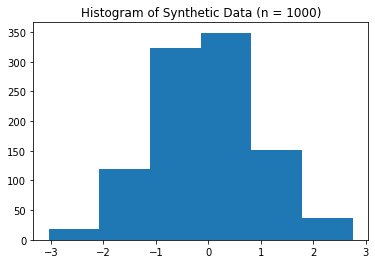

In [35]:
# Seed your Random Number Generator (RNG)
np.random.seed(0)
# Replace data with 1000 points:
data = np.random.randn(1000)

# compute and mean and variances, print the answer out like before:
new_mean = np.mean(data)
new_std = np.std(data)

# display the histogram with matplotlib
figure1, axes1 = plt.subplots()     # initialize a figure and axes for drawing
axes1.hist(data, bins = 6)          # Input your data and bins
axes1.set_title('Histogram of Synthetic Data (n = 1000)')
# Does the mean and variances match now?
print('\nMean is ' + str(new_mean) + '; variance is ' + str(new_std) + '.\n\nWith better sampling, the true mean and std are better approximated.\n')

## A little more realistic scenario.

Now, suppose you are recording the firing rate of neurons pre-treatment and post-treatment. Let's say your treatment is hypothesized to increase the firing rate of neurons. 

From your pilot study, you recorded from a small field of view that has 10 neurons, and your recording software summarized the recording and told you:

 - N = 10 neurons 
 - Pre-treatment data firing rate per second: mean = 150
 - Post-treatment data firing rate per second: mean = 160
 - Both datasets have about the same standard deviation $\sigma^2=30$, and assume normal distribution.

Use `np.random.normal()` to generate your 2 datasets, see docs here: https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy.random.normal

 - `np.random.normal` draws samples from a normal distribution, the first input `loc` is the mean of the distribution, the second input `scale` is the standard deviation, and the last is the amount of samples you want to draw. 

In [47]:
# Generate 2 fake datasets according to the pilot study scenario above, do not use a `seed` this time, also no need to plot the histogram:
N  = 10
s2 = 30     # standard deviation is the same for both groups

pre_data = np.random.normal(loc=150, scale=s2, size=N)
post_data = np.random.normal(loc=160, scale=s2, size=N)

After seeing this data, you got very excited and wanted to see if you got your hands on a significant finding, Perform a 2-sampled t-test with `scipy.stats.ttest_ind`, look at the documentations with `?` and plug in your data: 

In [45]:
from scipy.stats import ttest_ind

# Read scipy's t-test implementation docs:
#?ttest_ind

Now compute the t-statistics and obtain your p-value:

In [50]:
# perform the t-test:
results = ttest_ind(pre_data, post_data)   # plug in your data

# print output with descriptions:
print("My t-statistic is ", results[0])
print("My p-value is ", results[1])

My t-statistic is  -1.8429545465139594
My p-value is  0.08186747431607425


usSince we didn't use a `seed` this time, you can feel free and re-run the data generation cells and the t-test to see how your results change when different random samples are collected.

Should you be using the current output of a 2-tailed p-value for this experiment? Or should you be using a one-tailed p-value? What is your estimated one-tailed p-value? 

 > Since my hypothesis was directional, I can use a one-tailed pval. The 2-tailed pval is 0.08, so my one-tailed pval is 0.04.

If we are going by the popular stance of $p<0.05$ being significant, is your current t-test's result significant? What are the contributing factors to your p-value? 
 > My current one-tailed pval is significant, because I futzed around with the synthetic data until I got those. The contributing factors to my p-value are 1) my samples did not reflect the distributions accurately because of their small size, and 2) chance. Based on how long it took me to get a low pval, this looks like an underpowered study. The coding part of this exercise assumes a true difference in underlying means; it does not allow me to answer the question of whether my observation is significant. With a loop like we have below, it could tell me how many cells I need to record from if I was hoping to find a difference of 10 in my distributions some percent of the time.

You think that there should be a treatment effect in your current data, so you googled around and found Cohen's D as a metric for effect size, the formula being:

$$
d = \frac{u_1 - u_2}{s}
$$

Where $s$ is the pooled standard deviation for two independent samples:

$$
s = \sqrt{ \frac{SD_1^2 + SD_2^2}{2}}
$$

With $SD_1$ and $SD_2$ being standard deviations for the two samples respectively.

So you set out to compute this metric with the following readily made function:

In [52]:
def cohen_d(a, b):
    """
    Compute effect size with Cohen's D for samples a and b. 
    """
	# calculate the means of the sample
    u1 = np.mean(a)
    u2 = np.mean(b)
    # calculate the simplified pooled variance:
    s = np.sqrt((np.std(a)**2 + np.std(b)**2)/2)
    return (u1 - u2)/s

In [57]:
# Use the above function to compute your effect size:
d = cohen_d(pre_data, post_data)

print("My current effect size is ", d)

My current effect size is  -0.8687771048390661


Is your current effect size large? Use the [Cohen's D Wikipedia page](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) to judge if you are not too familiar with the metric. What does your $p$-value and $d$ metric say about your current results? Are they reliable? 
 
 > My current effect size of -0.87 is large! I cannot say whether my results are reliable because I did not do power calculations.

Now repeat the above experiment with $N=40$ while everything else is the same:

In [106]:
N = 40      # New sample size

# Generate your data:
pre_data = np.random.normal(loc=150, scale=s2, size=N)
post_data = np.random.normal(loc=160, scale=s2, size=N)
# Compute the T-statistic:
results = ttest_ind(pre_data, post_data)
# Compute the Cohen's D:
d = cohen_d(pre_data, post_data)
# Print out your answers:
print('For a sample of 40, my t-statistic is', results[0])
print('My p-value is', results[1])
print('My effect size is', d)

For a sample of 40, my t-statistic is -2.048575902710965
My p-value is 0.04386749307936213
My effect size is -0.4639110894683319
149.87522941101307 162.37103448645613
26.046350842224705 27.79675590209471


You should re-execute the above code cell for multiple trials of your experiment, you should be seeing a lot of different results because the variance in your data. 

What conclusions can you draw about the relationship of sample size and $p$-value? Why should you report effect size in addition to $p$-values?
 
 > The smaller the p-value, the larger the effect size. I am getting significant results more frequently, which means that the study is better powered with n = 40. Power, p-values, and effect size are closely related. For example, underpowered studies with significant p-values will miss phenomena with small effect sizes (see the cell below for illustration).

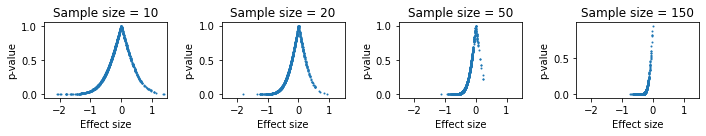

In [145]:
N = 10      # Sample size
plt.figure(figsize=(10,2))
ii = 0 # subplot counter
for N in [10, 20, 50, 150]:
    eff_sizes, pvals = [], [] # clear result lists
    for i in range(1000):
        # Generate  data:
        pre_data = np.random.normal(loc=150, scale=s2, size=N)
        post_data = np.random.normal(loc=160, scale=s2, size=N)
        # Compute the p-value on a 2-tailed test:
        _, pval = ttest_ind(pre_data, post_data)
        # Compute the Cohen's D:
        d = cohen_d(pre_data, post_data)
        # append results:
        eff_sizes.append(d)
        pvals.append(pval)
    # plot
    ii+=1
    ax = plt.subplot(1, 4, ii)
    plt.scatter(np.array(eff_sizes), np.array(pvals), s=1)
    plt.xlabel('Effect size')
    plt.ylabel('p-value')
    plt.title('Sample size = ' + str(N))
    plt.xlim(-2.5, 1.5)
    # toggle for a close-up
    #plt.ylim(0, 0.1)
plt.tight_layout()


Here, we are assuming a true difference of 10 in underlying means and equal standard deviations of 30. Our effect size is 0.3, but small samples will only let us see very large (overestimated) effect sizes at significant p-values. Adequate power for smaller effect sizes translates into larger sample sizes.

## P-Hacking:

P-hacking is where scientists try to achieve a significant result by increasing the sample size. In the following for-loop, we are dealing with data that's normally distributed with a small effect size (variance of 2, but difference in mean is only 1). 

Run this code with different sample sizes (N), and see how the output changes, don't be shy with N, you can go crazy high, but something as high as 500,000 might take a minute or two to run. 

In [99]:
N = 85

count_significant = 0   # start with 0 count
ntrials = 1000          # repeat the loop 1000 times
for i in range(ntrials):
    # Generate data
    a = np.random.normal(1,2,N)
    b = np.random.normal(0,2,N)

    # Compute statistics
    result = ttest_ind(a,b)

    # If pvalue < 0.05, count it.
    if result[1] < 0.05:
        count_significant += 1

print('The t-test was significant {}% of the time'.format((count_significant/ntrials)*100))

The t-test was significant 90.7% of the time


The $p$-value is supposed to indicate your chances of getting a false positive result. At what sample size (N) did you start seeing significant results more than 5% of the time? 20%? 50%? ~90%? 

 > At n = 2, in more than 5% of cases, you will find a significant result; at n = 12, in 20% of the cases; at n = 32, in 50% of cases, and at n = 85, in ~90% of the cases. The percentages in this case indicates power of a study and the n, the sample size necessary to achieve that power, for the effect size of 0.5 (difference in means over the standard deviation).